In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False 
#plt.rc('font', family='NanumGothic') 
plt.rc('font', family='Malgun Gothic') 

In [2]:
# logs.csv 파일을 읽으세요.
df_logs = pd.read_csv('data/logs.csv')
df_logs

,log,userid,date
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [3]:
# user_info.csv 파일을 읽으세요.
df_user_info = pd.read_csv('data/user_info.csv')
df_user_info

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted
0,0,OA832399,C01,F,2015-05-01 0:00,NaN,CA1,0
1,1,PL270116,C01,M,2015-05-01 0:00,NaN,CA1,0
2,2,OA974876,C01,M,2015-05-01 0:00,NaN,CA1,0
3,3,HD024127,C01,F,2015-05-01 0:00,NaN,CA1,-1
4,4,HD661448,C03,F,2015-05-01 0:00,NaN,CA1,-1
...,...,...,...,...,...,...,...,...
4187,4187,HD676663,C01,M,2019-03-14 0:00,NaN,CA1,0
4188,4188,HD246549,C01,F,2019-03-14 0:00,NaN,CA1,0
4189,4189,GD037007,C03,M,2019-03-14 0:00,NaN,CA1,0
4190,4190,OA953150,C01,M,2019-03-14 0:00,NaN,CA1,-1


In [4]:
# class.csv 파일을 읽으세요.
df_class = pd.read_csv('data/class.csv')
df_class

,class,class_name,price
0,C01,all,10000
1,C02,day,7000
2,C03,night,5000


In [5]:
# event.csv 파일을 읽으세요.
df_event = pd.read_csv('data/event.csv')
df_event

,event_type\tevent_name
0,CA1\tNone
1,CA2\tSale
2,CA3\tFree


In [6]:
# event.csv 파일을 다시 읽으세요.
# 구분자는 \t 입니다.
df_event = pd.read_csv('data/event.csv', sep='\t')
df_event

,event_type,event_name
0,CA1,None
1,CA2,Sale
2,CA3,Free


In [7]:
# 파편화된 데이터를 병합 합니다.

# 1. df_user_info와 df_class을 class를 기준으로 병합하세요. 
user = pd.merge(df_user_info, df_class, on='class')
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price
0,0,OA832399,C01,F,2015-05-01 0:00,NaN,CA1,0,all,10000
1,1,PL270116,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000
2,2,OA974876,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000
3,3,HD024127,C01,F,2015-05-01 0:00,NaN,CA1,-1,all,10000
4,5,IK271057,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000
...,...,...,...,...,...,...,...,...,...,...
4187,4166,IK947853,C02,F,2019-03-09 0:00,NaN,CA1,0,day,7000
4188,4176,OA301090,C02,F,2019-03-12 0:00,NaN,CA1,0,day,7000
4189,4182,OA643695,C02,F,2019-03-12 0:00,NaN,CA1,0,day,7000
4190,4186,HD522396,C02,F,2019-03-13 0:00,NaN,CA1,0,day,7000


In [8]:
# 2. user와 df_event를 event_type을 기준으로 병합하세요.
user = pd.merge(user, df_event, on='event_type')
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,event_name
0,0,OA832399,C01,F,2015-05-01 0:00,NaN,CA1,0,all,10000,None
1,1,PL270116,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000,None
2,2,OA974876,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000,None
3,3,HD024127,C01,F,2015-05-01 0:00,NaN,CA1,-1,all,10000,None
4,5,IK271057,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000,None
...,...,...,...,...,...,...,...,...,...,...,...
4187,3943,IK562610,C02,F,2018-12-13 0:00,2019-02-28 0:00,CA3,1,day,7000,Free
4188,3947,HI599354,C02,M,2018-12-13 0:00,NaN,CA3,0,day,7000,Free
4189,3952,GD796859,C02,F,2018-12-14 0:00,NaN,CA3,0,day,7000,Free
4190,3954,GD082270,C02,F,2018-12-14 0:00,2019-02-28 0:00,CA3,1,day,7000,Free


In [9]:
# user 데이터 프레임의 정보를 조회하세요
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4192 non-null   int64 
 1   userid      4192 non-null   object
 2   class       4192 non-null   object
 3   gender      4192 non-null   object
 4   start_date  4192 non-null   object
 5   end_date    1350 non-null   object
 6   event_type  4192 non-null   object
 7   is_deleted  4192 non-null   int64 
 8   class_name  4192 non-null   object
 9   price       4192 non-null   int64 
 10  event_name  4192 non-null   object
dtypes: int64(3), object(8)
memory usage: 393.0+ KB


In [15]:
# 결측치를 조회하세요.
user.isna().sum()

Unnamed: 0       0
userid           0
class            0
gender           0
start_date       0
end_date      2842
event_type       0
is_deleted       0
class_name       0
price            0
event_name       0
dtype: int64

In [16]:
# end_date컬럼이 결측치인 데이터만 선택하여 출력하세요
user.loc[user['end_date'].isna(), :]

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,event_name
0,0,OA832399,C01,F,2015-05-01 0:00,NaN,CA1,0,all,10000,None
1,1,PL270116,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000,None
2,2,OA974876,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000,None
3,3,HD024127,C01,F,2015-05-01 0:00,NaN,CA1,-1,all,10000,None
4,5,IK271057,C01,M,2015-05-01 0:00,NaN,CA1,0,all,10000,None
...,...,...,...,...,...,...,...,...,...,...,...
4184,3935,AS310166,C02,F,2018-12-12 0:00,NaN,CA3,0,day,7000,Free
4186,3941,HD071461,C02,F,2018-12-13 0:00,NaN,CA3,0,day,7000,Free
4188,3947,HI599354,C02,M,2018-12-13 0:00,NaN,CA3,0,day,7000,Free
4189,3952,GD796859,C02,F,2018-12-14 0:00,NaN,CA3,0,day,7000,Free


In [10]:
# end_date컬럼이 결측치인 데이터의 is_deleted 컬럼의 값별 개수를 카운트 하세요.
user.loc[user['end_date'].isna(), 'is_deleted'].value_counts()

 0    2131
-1     711
Name: is_deleted, dtype: int64

In [11]:
# end_date컬럼이 결측치가 아닌 데이터의 is_deleted 컬럼의 값별 개수를 카운트 하세요.
user.loc[~user['end_date'].isna(), 'is_deleted'].value_counts()

 1    1013
-1     337
Name: is_deleted, dtype: int64

In [19]:
# class_name을 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('class_name')['userid'].count()

class_name
all      2045
day      1019
night    1128
Name: userid, dtype: int64

In [20]:
# event_name을 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('event_name')['userid'].count()

event_name
Free     492
None    3050
Sale     650
Name: userid, dtype: int64

In [21]:
# gender를 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('gender')['userid'].count()

gender
F    1983
M    2209
Name: userid, dtype: int64

In [12]:
# is_deleted를 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('is_deleted')['userid'].count()

is_deleted
-1    1048
 0    2131
 1    1013
Name: userid, dtype: int64

In [13]:
# start_date 컬럼과 end_date 컬럼을 datetime 형태로 변환하세요
user['start_date'] = pd.to_datetime(user['start_date'])
user['end_date'] = pd.to_datetime(user['end_date'])

In [14]:
# datetime으로 변경을 확인하기 위해 정보를 조회하세요
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4192 non-null   int64         
 1   userid      4192 non-null   object        
 2   class       4192 non-null   object        
 3   gender      4192 non-null   object        
 4   start_date  4192 non-null   datetime64[ns]
 5   end_date    1350 non-null   datetime64[ns]
 6   event_type  4192 non-null   object        
 7   is_deleted  4192 non-null   int64         
 8   class_name  4192 non-null   object        
 9   price       4192 non-null   int64         
 10  event_name  4192 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 393.0+ KB


In [15]:
# start_date 컬럼을 기반으로 start_year, start_month, start_day 컬럼을 추가하세요
# dt 사용
user['start_year'] = user['start_date'].dt.year
user['start_month'] = user['start_date'].dt.month
user['start_day'] = user['start_date'].dt.day
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,event_name,start_year,start_month,start_day
0,0,OA832399,C01,F,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1
1,1,PL270116,C01,M,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1
2,2,OA974876,C01,M,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1
3,3,HD024127,C01,F,2015-05-01,NaT,CA1,-1,all,10000,None,2015,5,1
4,5,IK271057,C01,M,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,3943,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,day,7000,Free,2018,12,13
4188,3947,HI599354,C02,M,2018-12-13,NaT,CA3,0,day,7000,Free,2018,12,13
4189,3952,GD796859,C02,F,2018-12-14,NaT,CA3,0,day,7000,Free,2018,12,14
4190,3954,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,day,7000,Free,2018,12,14


In [26]:
# end_date 컬럼을 기반으로 end_year, end_month, end_day 컬럼을 추가하세요
# dt 사용
user['end_year'] = user['end_date'].dt.year
user['end_month'] = user['end_date'].dt.month
user['end_day'] = user['end_date'].dt.day
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,event_name,start_year,start_month,start_day,end_year,end_month,end_day
0,0,OA832399,C01,F,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1,NaN,NaN,NaN
1,1,PL270116,C01,M,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1,NaN,NaN,NaN
2,2,OA974876,C01,M,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1,NaN,NaN,NaN
3,3,HD024127,C01,F,2015-05-01,NaT,CA1,-1,all,10000,None,2015,5,1,NaN,NaN,NaN
4,5,IK271057,C01,M,2015-05-01,NaT,CA1,0,all,10000,None,2015,5,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,3943,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,day,7000,Free,2018,12,13,2019.0,2.0,28.0
4188,3947,HI599354,C02,M,2018-12-13,NaT,CA3,0,day,7000,Free,2018,12,13,NaN,NaN,NaN
4189,3952,GD796859,C02,F,2018-12-14,NaT,CA3,0,day,7000,Free,2018,12,14,NaN,NaN,NaN
4190,3954,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,day,7000,Free,2018,12,14,2019.0,2.0,28.0


In [27]:
# start_year와 start_month 컬럼을 이용하여 월별 신규 회원의 수를 조회하세요
user.groupby(['start_year', 'start_month'])['userid'].count()

start_year  start_month
2015        5               62
            6               69
            7               53
            8               53
            9               71
            10              54
            11              63
            12              67
2016        1               56
            2               48
            3               55
            4               57
            5               56
            6               76
            7               69
            8               77
            9               75
            10              71
            11              65
            12              76
2017        1               75
            2               74
            3               72
            4               99
            5              105
            6               95
            7              100
            8              122
            9              115
            10              98
            11             108
            12 

<AxesSubplot:xlabel='start_year,start_month'>

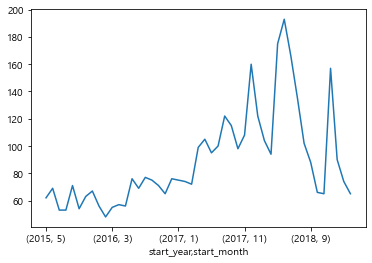

In [28]:
# 해당 결과를 시각화 하세요
user.groupby(['start_year', 'start_month'])['userid'].count().plot()

In [29]:
# end_year와 end_month 컬럼을 이용하여 월별 탈퇴 회원의 수를 조회하세요
user.groupby(['end_year', 'end_month'])['userid'].count()

end_year  end_month
2018.0    4.0          121
          5.0          125
          6.0          106
          7.0          102
          8.0          113
          9.0          104
          10.0          90
          11.0          89
          12.0         111
2019.0    1.0          129
          2.0          149
          3.0          111
Name: userid, dtype: int64

<AxesSubplot:xlabel='end_year,end_month'>

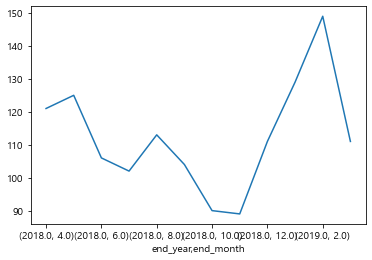

In [30]:
# 해당 결과를 시각화 하세요
user.groupby(['end_year', 'end_month'])['userid'].count().plot()

In [31]:
# 신규 가입이 가장 많은 상위 5개의 달을 조회하세요.
user.groupby(['start_year', 'start_month'])['userid'].count().sort_values(ascending=False).head()

start_year  start_month
2018        5              193
            4              175
            6              166
2017        12             160
2018        12             157
Name: userid, dtype: int64

In [32]:
# 2018년 4~6월 데이터만 추출하세요
top3 = user.loc[ (user['start_year'] == 2018) & (user['start_month'].isin([4,5,6])), : ]
top3

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,event_name,start_year,start_month,start_day,end_year,end_month,end_day
3204,2991,HD805503,C01,M,2018-05-01,NaT,CA2,-1,all,10000,Sale,2018,5,1,NaN,NaN,NaN
3205,2994,IK000432,C01,F,2018-05-01,2019-03-31,CA2,1,all,10000,Sale,2018,5,1,2019.0,3.0,31.0
3206,2996,AS247467,C01,M,2018-05-01,2018-11-30,CA2,-1,all,10000,Sale,2018,5,1,2018.0,11.0,30.0
3207,2999,OA777947,C01,M,2018-05-01,2018-12-31,CA2,-1,all,10000,Sale,2018,5,1,2018.0,12.0,31.0
3208,3000,HI630247,C01,M,2018-05-01,NaT,CA2,0,all,10000,Sale,2018,5,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,2970,PL850297,C02,F,2018-04-15,2018-05-31,CA3,1,day,7000,Free,2018,4,15,2018.0,5.0,31.0
4154,2971,HD104614,C02,F,2018-04-15,2019-02-28,CA3,1,day,7000,Free,2018,4,15,2019.0,2.0,28.0
4155,2977,AS628722,C02,F,2018-04-15,2019-02-28,CA3,1,day,7000,Free,2018,4,15,2019.0,2.0,28.0
4156,2979,GD716223,C02,F,2018-04-15,NaT,CA3,0,day,7000,Free,2018,4,15,NaN,NaN,NaN


In [33]:
# top3 데이터 프레임의 event_name 컬럼의 고유값별 개수를 조회하세요
top3['event_name'].value_counts()

Sale    359
Free    175
Name: event_name, dtype: int64

In [34]:
# top3 데이터 프레임의 class_name 컬럼의 고유값별 개수를 조회하세요
top3['class_name'].value_counts()

all      272
night    140
day      122
Name: class_name, dtype: int64

In [35]:
# df_logs의 date 컬럼을 datetime 형식으로 변경하세요.
df_logs['date'] = pd.to_datetime(df_logs['date'])
df_logs

,log,userid,date
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [36]:
# df_logs의 date 컬럼을 년월 형태로 표현하세요.
# dt와 strftime 함수 이용
df_logs['month'] = df_logs['date'].dt.strftime('%Y%m')
df_logs

,log,userid,date,month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [37]:
# df_logs에서 date와 userid를 기준으로 그룹을 생성 후 log의 개수를 카운트하세요.
df_logs_month = df_logs.groupby(['month','userid'])['log'].count()
df_logs_month

month   userid  
201804  AS002855    4
        AS009013    2
        AS009373    3
        AS015315    6
        AS015739    7
                   ..
201903  TS995853    8
        TS998593    8
        TS999079    3
        TS999231    6
        TS999855    4
Name: log, Length: 36842, dtype: int64

In [38]:
# df_logs_month 데이터 프레임의 인덱스를 초기화 하세요.
df_logs_month = df_logs_month.reset_index()
df_logs_month

,month,userid,log
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [39]:
# df_logs_month 데이터 프레임의 log 컬럼의 이름을 freq로 변경하세요
df_logs_month.rename(columns={'log':'freq'}, inplace=True)
df_logs_month

,month,userid,freq
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [40]:
# df_logs_month 데이터 프레임의 userid를 이용하여 freq 컬럼의 최소, 중앙값, 평균, 최대, 합계를 계산하세요.
user_log = df_logs_month.groupby('userid')['freq'].agg(['min', 'median', 'mean', 'max', 'sum'])
user_log

,min,median,mean,max,sum
userid,,,,,
AS002855,2,5.0,4.500000,7,54
AS008805,1,4.0,4.000000,8,40
AS009013,2,2.0,2.000000,2,2
AS009373,3,5.0,5.083333,7,61
AS015233,4,7.0,7.545455,11,83
...,...,...,...,...,...
TS995853,8,9.5,9.500000,11,19
TS998593,7,8.0,8.142857,9,57
TS999079,2,5.5,4.916667,9,59


In [41]:
# user_log 데이터 프레임의 인덱스를 초기화 하세요.
user_log.reset_index(inplace=True)
user_log

,userid,min,median,mean,max,sum
0,AS002855,2,5.0,4.500000,7,54
1,AS008805,1,4.0,4.000000,8,40
2,AS009013,2,2.0,2.000000,2,2
3,AS009373,3,5.0,5.083333,7,61
4,AS015233,4,7.0,7.545455,11,83
...,...,...,...,...,...,...
4187,TS995853,8,9.5,9.500000,11,19
4188,TS998593,7,8.0,8.142857,9,57
4189,TS999079,2,5.5,4.916667,9,59
4190,TS999231,1,5.0,4.666667,8,56


In [42]:
# df_logs 데이터 프레임을 이용하여 요일(weekday) 정보를 추출하세요
df_logs["wday"] = df_logs["date"].dt.weekday
df_logs

,log,userid,date,month,wday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [43]:
# df_logs 데이터 프레임의 userid, month, wday 컬럼을 그룹으로 log 컬럼의 개수를 카운트하세요.
df_logs_weekly = df_logs.groupby(['userid','month','wday'])['log'].agg(['count'])
df_logs_weekly

count
userid   month  wday       
AS002855 201804 5         4
         201805 2         1
                5         4
         201806 5         5
         201807 1         1
...                     ...
TS999855 201901 1         1
                5         4
                6         1
         201902 5         4
         201903 5         4

[93333 rows x 1 columns]

In [44]:
# df_logs_weekly의 인덱스를 초기화 하세요.
df_logs_weekly.reset_index(inplace=True)
df_logs_weekly

,userid,month,wday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [45]:
# 매주 방문하는 사람을 찾기 위해 df_logs_weekly 데이터 프레임의 userid 컬럼을 그룹으로 최대값을 계산하세요
df_logs_weekly_routine = df_logs_weekly.groupby('userid').max()
df_logs_weekly_routine

,month,wday,count
userid,,,
AS002855,201903,6,5
AS008805,201903,6,4
AS009013,201804,0,2
AS009373,201903,6,5
AS015233,201903,6,5
...,...,...,...
TS995853,201903,6,5
TS998593,201903,6,5
TS999079,201903,6,5


In [46]:
# df_logs_weekly_routine 데이터 프레임에 0의 값을 가지는 routine 컬럼을 추가하세요.
df_logs_weekly_routine['routine'] = 0
df_logs_weekly_routine

,month,wday,count,routine
userid,,,,
AS002855,201903,6,5,0
AS008805,201903,6,4,0
AS009013,201804,0,2,0
AS009373,201903,6,5,0
AS015233,201903,6,5,0
...,...,...,...,...
TS995853,201903,6,5,0
TS998593,201903,6,5,0
TS999079,201903,6,5,0


In [47]:
# count 컬럼의 값이 4 이상인 경우 routine 컬럼의 값을 1로 변경하세요
df_logs_weekly_routine.loc[df_logs_weekly_routine['count'] >= 4, 'routine'] = 1
df_logs_weekly_routine

,month,wday,count,routine
userid,,,,
AS002855,201903,6,5,1
AS008805,201903,6,4,1
AS009013,201804,0,2,0
AS009373,201903,6,5,1
AS015233,201903,6,5,1
...,...,...,...,...
TS995853,201903,6,5,1
TS998593,201903,6,5,1
TS999079,201903,6,5,1


In [48]:
# df_logs_weekly_routine 컬럼의 인덱스를 초기화하고 userid컬럼과 routine 컬럼만 추출하세요.
routine = df_logs_weekly_routine.reset_index()[['userid', 'routine']]
routine

,userid,routine
0,AS002855,1
1,AS008805,1
2,AS009013,0
3,AS009373,1
4,AS015233,1
...,...,...
4187,TS995853,1
4188,TS998593,1
4189,TS999079,1
4190,TS999231,1


In [49]:
# user 데이터 프레임과 user_log 데이터 프레임을 userid를 기준으로 병합하세요
user = pd.merge(user, user_log, on='userid')
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,...,start_month,start_day,end_year,end_month,end_day,min,median,mean,max,sum
0,0,OA832399,C01,F,2015-05-01,NaT,CA1,0,all,10000,...,5,1,NaN,NaN,NaN,2,5.0,4.833333,8,58
1,1,PL270116,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,5,1,NaN,NaN,NaN,3,5.0,5.083333,7,61
2,2,OA974876,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,5,1,NaN,NaN,NaN,3,5.0,4.583333,6,55
3,3,HD024127,C01,F,2015-05-01,NaT,CA1,-1,all,10000,...,5,1,NaN,NaN,NaN,2,4.5,4.833333,7,58
4,5,IK271057,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,5,1,NaN,NaN,NaN,2,3.5,3.750000,5,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,3943,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,day,7000,...,12,13,2019.0,2.0,28.0,3,4.0,5.666667,10,17
4188,3947,HI599354,C02,M,2018-12-13,NaT,CA3,0,day,7000,...,12,13,NaN,NaN,NaN,5,7.5,7.500000,10,30
4189,3952,GD796859,C02,F,2018-12-14,NaT,CA3,0,day,7000,...,12,14,NaN,NaN,NaN,6,7.5,7.250000,8,29
4190,3954,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,day,7000,...,12,14,2019.0,2.0,28.0,3,5.0,6.000000,10,18


In [50]:
# user 데이터 프레임과 routine 데이터 프레임을 userid를 기준으로 병합하세요
user = pd.merge(user, routine, on='userid')
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,...,start_day,end_year,end_month,end_day,min,median,mean,max,sum,routine
0,0,OA832399,C01,F,2015-05-01,NaT,CA1,0,all,10000,...,1,NaN,NaN,NaN,2,5.0,4.833333,8,58,1
1,1,PL270116,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,1,NaN,NaN,NaN,3,5.0,5.083333,7,61,1
2,2,OA974876,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,1,NaN,NaN,NaN,3,5.0,4.583333,6,55,1
3,3,HD024127,C01,F,2015-05-01,NaT,CA1,-1,all,10000,...,1,NaN,NaN,NaN,2,4.5,4.833333,7,58,1
4,5,IK271057,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,1,NaN,NaN,NaN,2,3.5,3.750000,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,3943,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,day,7000,...,13,2019.0,2.0,28.0,3,4.0,5.666667,10,17,0
4188,3947,HI599354,C02,M,2018-12-13,NaT,CA3,0,day,7000,...,13,NaN,NaN,NaN,5,7.5,7.500000,10,30,1
4189,3952,GD796859,C02,F,2018-12-14,NaT,CA3,0,day,7000,...,14,NaN,NaN,NaN,6,7.5,7.250000,8,29,1
4190,3954,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,day,7000,...,14,2019.0,2.0,28.0,3,5.0,6.000000,10,18,0


In [51]:
# end_date 컬럼와 start_date 컬럼의 차이를 이용하여 회원 기간을 계산하세요
user['period'] = user['end_date'] - user['start_date']
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,...,end_year,end_month,end_day,min,median,mean,max,sum,routine,period
0,0,OA832399,C01,F,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,2,5.0,4.833333,8,58,1,NaT
1,1,PL270116,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,3,5.0,5.083333,7,61,1,NaT
2,2,OA974876,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,3,5.0,4.583333,6,55,1,NaT
3,3,HD024127,C01,F,2015-05-01,NaT,CA1,-1,all,10000,...,NaN,NaN,NaN,2,4.5,4.833333,7,58,1,NaT
4,5,IK271057,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,2,3.5,3.750000,5,45,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,3943,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,day,7000,...,2019.0,2.0,28.0,3,4.0,5.666667,10,17,0,77 days
4188,3947,HI599354,C02,M,2018-12-13,NaT,CA3,0,day,7000,...,NaN,NaN,NaN,5,7.5,7.500000,10,30,1,NaT
4189,3952,GD796859,C02,F,2018-12-14,NaT,CA3,0,day,7000,...,NaN,NaN,NaN,6,7.5,7.250000,8,29,1,NaT
4190,3954,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,day,7000,...,2019.0,2.0,28.0,3,5.0,6.000000,10,18,0,76 days


In [52]:
# period 컬럼이 NaT인 경우 아직 탈퇴하지않은 회원으로 2019년04월30일을 기준으로 차이를 계산합니다.
user.loc[user['period'].isna(), 'period'] = pd.to_datetime("20190430") - user['start_date']
user

,Unnamed: 0,userid,class,gender,start_date,end_date,event_type,is_deleted,class_name,price,...,end_year,end_month,end_day,min,median,mean,max,sum,routine,period
0,0,OA832399,C01,F,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,2,5.0,4.833333,8,58,1,1460 days
1,1,PL270116,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,3,5.0,5.083333,7,61,1,1460 days
2,2,OA974876,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,3,5.0,4.583333,6,55,1,1460 days
3,3,HD024127,C01,F,2015-05-01,NaT,CA1,-1,all,10000,...,NaN,NaN,NaN,2,4.5,4.833333,7,58,1,1460 days
4,5,IK271057,C01,M,2015-05-01,NaT,CA1,0,all,10000,...,NaN,NaN,NaN,2,3.5,3.750000,5,45,1,1460 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,3943,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,day,7000,...,2019.0,2.0,28.0,3,4.0,5.666667,10,17,0,77 days
4188,3947,HI599354,C02,M,2018-12-13,NaT,CA3,0,day,7000,...,NaN,NaN,NaN,5,7.5,7.500000,10,30,1,138 days
4189,3952,GD796859,C02,F,2018-12-14,NaT,CA3,0,day,7000,...,NaN,NaN,NaN,6,7.5,7.250000,8,29,1,137 days
4190,3954,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,day,7000,...,2019.0,2.0,28.0,3,5.0,6.000000,10,18,0,76 days


In [53]:
# user 데이터 프레임의 min, median, mean, max, sum 컬럼의 기술통계요약정보를 출력하세요.
user[['min', 'median', 'mean', 'max', 'sum']].describe()

,min,median,mean,max,sum
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,3.041269,5.250596,5.333127,7.823950,47.096374
std,1.951565,1.874874,1.777533,2.168959,24.218124
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,4.250000,7.000000,26.000000
50%,3.000000,5.000000,5.000000,8.000000,53.000000
75%,4.000000,6.500000,6.416667,9.000000,65.000000
max,12.000000,12.000000,12.000000,14.000000,105.000000


In [54]:
# user 데이터 프레임의 routine 컬럼의 고유값별 개수를 계산하세요
user['routine'].value_counts()

1    3413
0     779
Name: routine, dtype: int64

<AxesSubplot:>

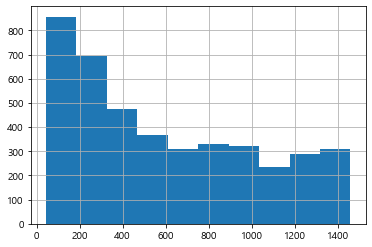

In [55]:
# user 데이터 프레임의 period_day 컬럼의 histogram을 그려보세요.
user['period_day'] = user['period'].dt.days
user['period_day'].hist()